# Assignment 2 
## Question 1 - LLM for data engineering
### LLMs’ fast, articulate answers to expert questions can help data engineers discover datasets, write and debug code, document procedures, and learn new techniques as they build data pipelines. In this question, you are required to write suitable prompts for ChatGPT to achieve the following targets.

1.Assume you need some datasets for training a knowledge-grounded dialogue generation model. Please
utilize the ChatGPT (GPT4) to find the datasets you need. List the prompts you give and the outputs of
ChatGPT.

**Solution:**

## Question 2 - Data Indexing
### Given the following B+-tree, please answer following questions.
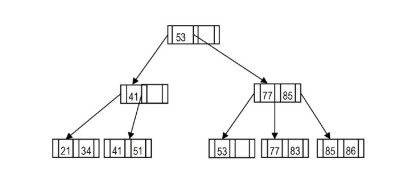

1.What is the value of p for this B+-tree? (Note that p is the order of a B+-tree)

**Solution:**
p is 3

2.Can you re-build a taller B+-tree with the same value of p using the same set of search-key values in the leaf nodes of the given tree? If yes, show the steps by drawing a new diagram whenever the height of the tree increases.

**Solution:**





## Question 3 - Data Querying  
The university conducted a hacker contest which consists of a set of small tasks. The participants can
submit the solutions to each task and obtain the score regarding each submission. The top-3 participants of each task
will win the corresponding bonus.
Given the following SQL tables,  
```sql
Hackers(hacker_id: INT, name: VARCHAR, Bank_account: INT)  
Tasks(task_id: INT, task_description: VARCHAR, bonus: INT)  
Submissions(submission_id: INT, hacker_id: INT, task_id: INT, score: INT, submission_data: DATE)  
```
Assuming that,  
•The id values, including hack id, task id, submission id, are unique and serve as foreign keys.  
•There are 10,000 hackers registering the contest, but not all hackers have the submissions.  
•There are totally 50 small tasks. For each task, hackers can have multiple submissions, but only the last  
submission obtaining the best score will be considered when calculating the final winner shortlist. If more
than three submissions achieved top-3 scores, only the earliest three submissions will be rewarded. The earlier
submission has the smaller submission id.  
•There are totally 100,000 submissions. The scores of all tasks range from 0 to 100


1.Write the query to print the hacker id, name of the hacker who has the most submissions. If more
than one such hacker has the maximum submission number, the results are sorted by ascending hack id.
**Solution:**
```sql 
SELECT h.hacker_id, h.name
FROM Hackers h
JOIN (
    SELECT hacker_id, COUNT(*) as submission_count
    FROM Submissions
    GROUP BY hacker_id
    HAVING submission_count = (
        SELECT MAX(submission_count)
        FROM (
            SELECT hacker_id, COUNT(*) as submission_count
            FROM Submissions
            GROUP BY hacker_id
        )
    )
) max_submission
ON h.hacker_id = max_submission.hacker_id
ORDER BY h.hacker_id;
```

2.Write the query to print the task id, task description and the number of submissions received
of the task which receives the most submissions. If there are more than one such task, the results are sorted by
the ascending task id.  
**Solution:**
```sql
SELECT t.task_id, t.task_description, COUNT(*) as submission_count
FROM Tasks t
JOIN (
    SELECT task_id, COUNT(*) as submission_count
    FROM Submissions
    GROUP BY task_id
    HAVING submission_count = (
        SELECT MAX(submission_count)
        FROM (
            SELECT task_id, COUNT(*) as submission_count
            FROM Submissions
            GROUP BY task_id
        ) 
    )
) max_submission
ON t.task_id = max_submission.task_id
ORDER BY t.task_id;
```



3.Write the query to print the submission id, name, task description of the submission whose score
is the highest one among all scores obtained on 2022-10-01. If more than one such submissions, the results are
sorted by ascending submission id  
**Solution:**
```sql
SELECT score_max.submission_id, h.name, t.task_description
FROM Tasks t
JOIN (
    SELECT hacker_id, submission_id, task_id, MAX(score) as max_score
    FROM Submissions
    WHERE submission_data = '2022-10-01'
    GROUP BY task_id
) score_max
ON t.task_id = score_max.task_id
JOIN Hackers h
ON h.hacker_id = score_max.hacker_id
ORDER BY s.submission_id;
```


4.Write the query to print the hacker id, name of the hacker who has the highest total scores on all
tasks. For each task, if the hacker has multiple submissions, only the best score is accounted. If more than one
such hacker, the results are sorted by descending hacker id  
**Solution:**
```sql
SELECT h.hacker_id, h.name
FROM Hackers h
JOIN 
(SELECT hacker_id, SUM(score) as total_score
    FROM 
    (
        SELECT hacker_id, task_id, max(score) as score
        FROM Submissions
        GROUP BY hacker_id, task_id
    ) hacker_task_score
    GROUP BY hacker_id
    HAVING total_score = (
        SELECT MAX(total_score)
        FROM (
            SELECT hacker_id, SUM(score) as total_score
            FROM  hacker_task_score
            GROUP BY hacker_id
        )
    )
) hacker_total_score
ON h.hacker_id = hacker_total_score.hacker_id
ORDER BY h.hacker_id DESC;
```



5.write the query to print the hacker id, name, bonus of the hackers and the task fulfilling the
requirement that the hackers win the bonus on task with task id=25
**Solution:**
```sql
SELECT h.hacker_id, h.name, t.bonus
FROM Hackers h
JOIN (
    SELECT hacker_id, task_id, MAX(score) as score
    FROM Submissions
    GROUP BY hacker_id, task_id
) hacker_task_score
ON h.hacker_id = hacker_task_score.hacker_id
JOIN Tasks t
ON t.task_id = hacker_task_score.task_id
WHERE t.task_id = 25;
```


6.Write the query to print the hacker id, hacker name, bank account and the total bonus of all
participants. The result is sorted by descending total bonus and ascending hacker id. Exclude all hackers
with a total bonus of 0 from the result
**Solution:**
```sql
SELECT h.hacker_id, h.name, h.bank_account, COALESCE(SUM(t.bonus), 0) AS total_bonus
FROM Hackers h
LEFT JOIN Submissions s ON h.hacker_id = s.hacker_id
LEFT JOIN Tasks t ON s.task_id = t.task_id
GROUP BY h.hacker_id, h.name, h.bank_account
HAVING COALESCE(SUM(t.bonus), 0) > 0
ORDER BY total_bonus DESC, h.hacker_id ASC;



## Question 4 - Recommender System


1. Please write two basic approaches for recommender system and briefly explain them
   
**Solution:** 

Collaborative filtering methods: Collaborative filtering method finds a subset of users whohave similar tastes and preferences to the target user and use this subset for offering recommendations.  
Basic Assumptions :
- Users with similar interests have common preferences.
- Sufficiently large number of user preferences are available.  
  
Content based methods: Content-based recommender systems use items or user metadata to create specific recommendations. In this system, keywords are used to describe the items, and a user profile is built to indicate the type of item this user likes. In other words, these algorithms try to recommend items similar to those that a user liked in the past or is examining in the present. It does not rely on a user sign-in mechanism to generate this often temporary profile. In particular, various candidate items are compared with items previously rated by the user, and the best-matching items are recommended. This approach has its roots in information retrieval and information filtering research.

To create a user profile, the system mostly focuses on two types of information:

1. A model of the user's preference.

2. A history of the user's interaction with the recommender system.

2. Cold start is a severe problem for recommender system. Please explain what is cold start problem
in recommender system and how to solve it (list at least TWO methods).  

**Solution:**  

Explanation:The main goal of a recommendation system is to recommend a large number of items to a vast number of users, involving two types of entities: items and users. In any internet recommendation product, both items and users are constantly growing and changing. Therefore, one frequently encounters the cold start problem in recommendation systems, which refers to how to recommend items to new users or distribute new items to users who would like them.  
Additionally, for newly developed products with few initial users and limited user behavior data, conventional algorithms like collaborative filtering and deep learning that rely on a significant amount of user data may not effectively train accurate recommendation models. The challenge is to get the recommendation system up and running successfully and continually improve its accuracy, which is known as the system cold start problem.  
In summary, the recommendation system cold start problem can be categorized into three main types: item cold start, user cold start, and system cold start.  
Methods:  
1. Profile completion:  
    One of the available options when dealing with cold users or items is to rapidly acquire some preference data. There are various ways to do that depending on the amount of information required. These techniques are called preference elicitation strategies. This may be done either explicitly (by querying the user) or implicitly (by observing the user's behaviour). In both cases, the cold start problem would imply that the user has to dedicate an amount of effort using the system in its 'dumb' state – contributing to the construction of their user profile – before the system can start providing any intelligent recommendations.
2. Feature mapping:  
   In recent years more advanced strategies have been proposed, they all rely on machine learning and attempt to merge the content and collaborative information in a single model. One example of this approaches is called attribute to feature mapping which is tailored to matrix factorization algorithms. The basic idea is the following. A matrix factorization model represents the user-item interactions as the product of two rectangular matrices whose content is learned using the known interactions via machine learning. Each user will be associated to a row of the first matrix and each item with a column of the second matrix. The row or column associated to a specific user or item is called latent factors. When a new item is added it has no associated latent factors and the lack of interactions does not allow to learn them, as it was done with other items. If each item is associated to some features (e.g. author, year, publisher, actors) it is possible to define an embedding function, which given the item features estimates the corresponding item latent factors. The embedding function can be designed in many ways and it is trained with the data already available from warm items. Alternatively, one could apply a group-specific method. A group-specific method further decomposes each latent factor into two additive parts: One part corresponds to each item (and/or each user), while the other part is shared among items within each item group (e.g., a group of movies could be movies of the same genre). Then once a new item arrives, we can assign a group label to it, and approximates its latent factor by the group-specific part (of the corresponding item group). Therefore, although the individual part of the new item is not available, the group-specific part provides an immediate and effective solution. The same applies for a new user, as if some information is available for them (e.g. age, nationality, gender) then his/her latent factors can be estimated via an embedding function or a group-specific latent factor.

3. Rating prediction is an important task for the recommender system. Try to implement a recom-mendation model on the Movielens-100k dataset to predict user rating.   
   
**Solution:**

In [57]:
import pandas as pd
import numpy as np

# read the data from the ml-100k/ua.base file and store it in a pandas dataframe
train_data_file=r'ml-100k/ml-100k/ua.base'
test_data_file=r'ml-100k/ml-100k/ua.test'
train_data=pd.read_csv(train_data_file,sep='\t',names=['user_id','item_id','rating','timestamp'])
test_data=pd.read_csv(test_data_file,sep='\t',names=['user_id','item_id','rating','timestamp'])


In [58]:
# create a matrix and fill 0 values
train_data_matrix = train_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
test_data_matrix=test_data.pivot(index='user_id',columns='item_id',values='rating').fillna(0)



In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.sparse.linalg import svds

u, s, vt = svds(train_data_matrix.values, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
X_pred.shape
predicted_ratings_svd = X_pred[test_data_matrix.values.nonzero()]
test_truth=test_data_matrix.values[test_data_matrix.values.nonzero()]

sqrt(mean_squared_error(predicted_ratings_svd,test_truth))


(943, 20) (20,) (20, 1680)


3.3396691738498445